In [26]:
import sys
import importlib
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
import re
import pandas as pd
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt
from scipy.stats import fisher_exact, combine_pvalues
from scipy.stats import chi2_contingency
import pysam
from tqdm import tqdm
from scipy.optimize import curve_fit


plt.rcdefaults()
# mpl.rcParams[''] = 42
# mpl.rcParams['font.size'] = 14

plt.style.use('default')

def theme_classic():
    mpl.rcParams.update({
        'pdf.fonttype': 42,
        'font.size': 12,
        'axes.grid': False,
        'axes.facecolor': 'white',
        'figure.facecolor': 'white',
        'axes.edgecolor': 'black',
        'axes.linewidth': 1.0,
        'axes.spines.top': False,
        'axes.spines.right': False,
        'xtick.direction': 'out',
        'ytick.direction': 'out'
    })

theme_classic()

## Figure1C

In [25]:
def sin_model(x, A, phi, C):
    P = 180  # fixed nucleosome period
    return A * np.sin(2*np.pi*x/P + phi) + C

In [3]:
n_genes = {'low': 1410, 'middle': 3453, 'high': 1153}

In [5]:
inpath = '../data/chrom/'

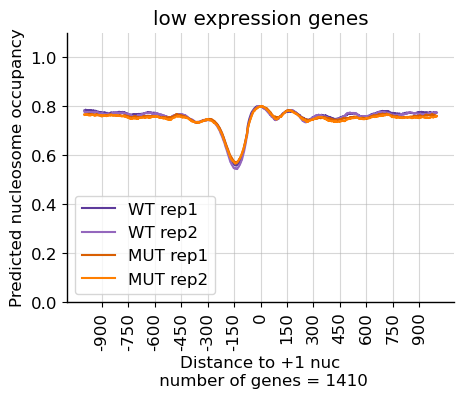

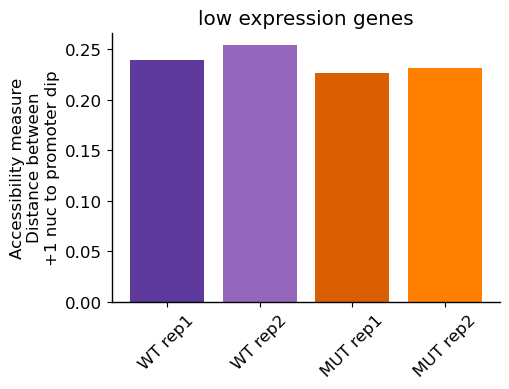

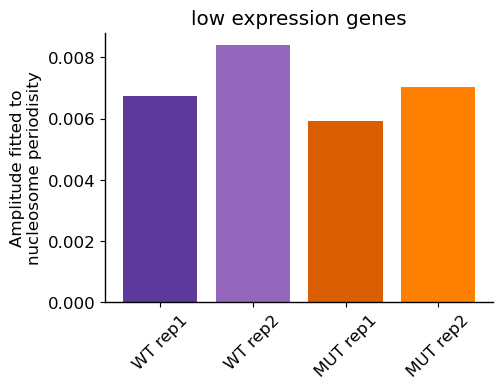

In [24]:
fig, ax1 = plt.subplots(figsize=(5, 3.5))
cmap = ['#5D3A9B', '#9467bd', '#d95f02', '#ff7f00']

ys18_rep1_agg = f'{inpath}251111_low_expr_genes_denovo_plus_one_ys18_rep1_aggregate_score.tsv'
ys18_rep2_agg = f'{inpath}251111_low_expr_genes_denovo_plus_one_ys18_rep2_aggregate_score.tsv'
ym209_rep1_agg = f'{inpath}251111_low_expr_genes_denovo_plus_one_ym209_rep1_aggregate_score.tsv'
ym209_rep2_agg = f'{inpath}251111_low_expr_genes_denovo_plus_one_ym209_rep2_aggregate_score.tsv'
allagg = [ys18_rep1_agg, ys18_rep2_agg, ym209_rep1_agg, ym209_rep2_agg]

hw = int(2000/2)
space=150
labels = ['WT rep1', 'WT rep2', 'MUT rep1', 'MUT rep2']
dists = []
amplitudes = []
k = 1
for i in range(len(allagg)):
    with open(allagg[i], 'r') as infile:
        agg_scores = []
        for line in infile:
            line = line.strip().split('\t')
            agg_scores.append(float(line[k]))
        
        # dist between peak to dip
        peak = max(agg_scores[995:1005])
        dip = min(agg_scores[845:855])
        dist = 0.8 - peak
        agg_scores_norm = [s + dist for s in agg_scores]
        dists.append(peak-dip)

        x = np.arange(-hw, hw+1)
        y = np.array(agg_scores_norm)
        
        # magnitute
        mask = (x > 0) & (x < 800)
        x_fit = x[mask]
        y_fit = y[mask]
        
        popt, _ = curve_fit(sin_model,x_fit,y_fit, p0=[0.1, 0, 0.5])
        
        A_fit = abs(popt[0])
        amplitudes.append(A_fit)

        ax1.plot(np.arange(-hw, hw+1), agg_scores_norm, label = labels[i], color=cmap[i], alpha=1)

x_ticks = np.concatenate((np.flip(np.arange(0, -hw-1, -space)[1:]), np.arange(0, hw+1, space)), axis=0)

ax1.grid(alpha=0.5)

ax1.set_xticks(x_ticks)

ax1.set_xticklabels(x_ticks, rotation='vertical')

ax1.set_xlabel(f"Distance to +1 nuc\n number of genes = {n_genes['low']}")
ax1.set_ylabel('Predicted nucleosome occupancy')
ax1.set_title('low expression genes')
ax1.set_ylim(0.0,1.1)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.legend()
plt.savefig('../figures/Figure1C_agg_all_sample_low_expr.pdf', bbox_inches='tight')
plt.show()
plt.close()

plt.figure(figsize=(5, 3.5))
left = 1
for i in range(len(dists)):
    plt.bar(left, dists[i], label = labels[i], color=cmap[i])
    left += 1
plt.title('low expression genes')
plt.xticks(np.arange(1, len(dists)+1), labels, rotation = 45)
plt.ylabel('Accessibility measure\nDistance between\n+1 nuc to promoter dip')
plt.savefig('../figures/Supp_distance_between_peak_dip_all_sample_low_expr.pdf', bbox_inches='tight')

plt.figure(figsize=(5, 3.5))
left = 1
for i in range(len(dists)):
    plt.bar(left, amplitudes[i], label = labels[i], color=cmap[i])
    left += 1

plt.title('low expression genes')
plt.xticks(np.arange(1, len(dists)+1), labels, rotation = 45)
plt.ylabel('Amplitude fitted to\nnucleosome periodisity')
plt.savefig('../figures/Supp_amplitude_all_sample_low_expr.pdf', bbox_inches='tight')
plt.show()
plt.close()

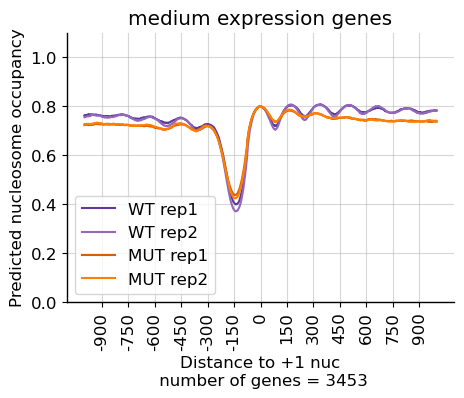

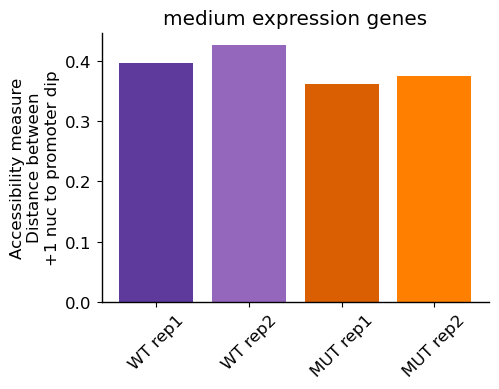

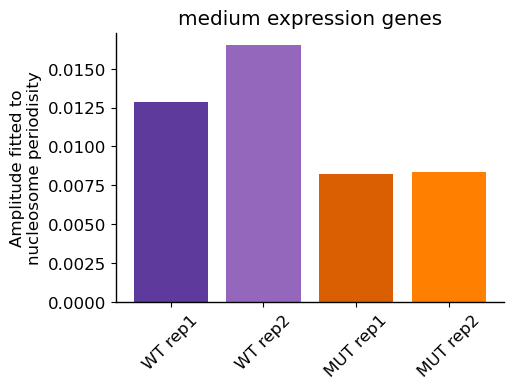

In [22]:
fig, ax1 = plt.subplots(figsize=(5, 3.5))
cmap = ['#5D3A9B', '#9467bd', '#d95f02', '#ff7f00']

ys18_rep1_agg = f'{inpath}251111_middle_expr_genes_denovo_plus_one_ys18_rep1_aggregate_score.tsv'
ys18_rep2_agg = f'{inpath}251111_middle_expr_genes_denovo_plus_one_ys18_rep2_aggregate_score.tsv'
ym209_rep1_agg = f'{inpath}251111_middle_expr_genes_denovo_plus_one_ym209_rep1_aggregate_score.tsv'
ym209_rep2_agg = f'{inpath}251111_middle_expr_genes_denovo_plus_one_ym209_rep2_aggregate_score.tsv'
allagg = [ys18_rep1_agg, ys18_rep2_agg, ym209_rep1_agg, ym209_rep2_agg]

hw = int(2000/2)
space=150
labels = ['WT rep1', 'WT rep2', 'MUT rep1', 'MUT rep2']
dists = []
amplitudes = []
k = 1
for i in range(len(allagg)):
    with open(allagg[i], 'r') as infile:
        agg_scores = []
        for line in infile:
            line = line.strip().split('\t')
            agg_scores.append(float(line[k]))
        
        # dist between peak to dip
        peak = max(agg_scores[995:1005])
        dip = min(agg_scores[845:855])
        dist = 0.8 - peak
        agg_scores_norm = [s + dist for s in agg_scores]
        dists.append(peak-dip)

        x = np.arange(-hw, hw+1)
        y = np.array(agg_scores_norm)
        
        # magnitute
        mask = (x > 0) & (x < 800)
        x_fit = x[mask]
        y_fit = y[mask]
        
        popt, _ = curve_fit(sin_model,x_fit,y_fit, p0=[0.1, 0, 0.5])
        
        A_fit = abs(popt[0])
        amplitudes.append(A_fit)

        ax1.plot(np.arange(-hw, hw+1), agg_scores_norm, label = labels[i], color=cmap[i], alpha=1)

x_ticks = np.concatenate((np.flip(np.arange(0, -hw-1, -space)[1:]), np.arange(0, hw+1, space)), axis=0)

ax1.grid(alpha=0.5)

ax1.set_xticks(x_ticks)

ax1.set_xticklabels(x_ticks, rotation='vertical')

ax1.set_xlabel(f"Distance to +1 nuc\n number of genes = {n_genes['middle']}")
ax1.set_ylabel('Predicted nucleosome occupancy')
ax1.set_title('median expression genes')
ax1.set_ylim(0.0,1.1)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.legend()
plt.savefig('../figures/Figure1C_agg_all_sample_median_expr.pdf', bbox_inches='tight')
plt.show()
plt.close()

plt.figure(figsize=(5, 3.5))
left = 1
for i in range(len(dists)):
    plt.bar(left, dists[i], label = labels[i], color=cmap[i])
    left += 1

plt.title('median expression genes')
plt.xticks(np.arange(1, len(dists)+1), labels, rotation = 45)
plt.ylabel('Accessibility measure\nDistance between\n+1 nuc to promoter dip')
plt.savefig('../figures/Supp_distance_between_peak_dip_all_sample_middle_expr.pdf', bbox_inches='tight')

plt.figure(figsize=(5, 3.5))
left = 1
for i in range(len(dists)):
    plt.bar(left, amplitudes[i], label = labels[i], color=cmap[i])
    left += 1

plt.title('median expression genes')
plt.xticks(np.arange(1, len(dists)+1), labels, rotation = 45)
plt.ylabel('Amplitude fitted to\nnucleosome periodisity')
plt.savefig('../figures/Supp_amplitude_all_sample_median_expr.pdf', bbox_inches='tight')
plt.show()
plt.close()

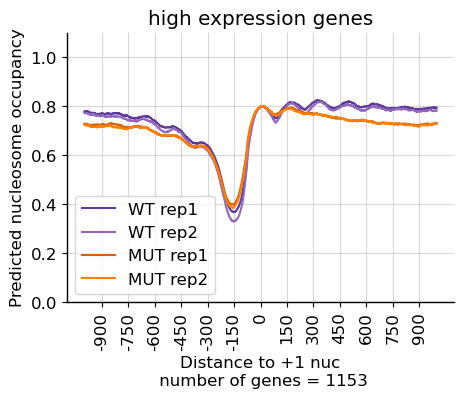

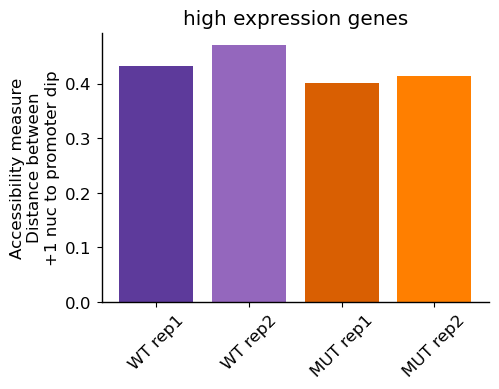

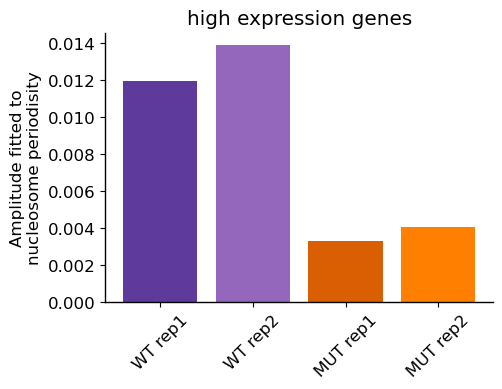

In [28]:
fig, ax1 = plt.subplots(figsize=(5,3.5))
cmap = ['#5D3A9B', '#9467bd', '#d95f02', '#ff7f00']

ys18_rep1_agg = f'{inpath}251111_high_expr_genes_denovo_plus_one_ys18_rep1_aggregate_score.tsv'
ys18_rep2_agg = f'{inpath}251111_high_expr_genes_denovo_plus_one_ys18_rep2_aggregate_score.tsv'
ym209_rep1_agg = f'{inpath}251111_high_expr_genes_denovo_plus_one_ym209_rep1_aggregate_score.tsv'
ym209_rep2_agg = f'{inpath}251111_high_expr_genes_denovo_plus_one_ym209_rep2_aggregate_score.tsv'
allagg = [ys18_rep1_agg, ys18_rep2_agg, ym209_rep1_agg, ym209_rep2_agg]

hw = int(2000/2)
space=150
labels = ['WT rep1', 'WT rep2', 'MUT rep1', 'MUT rep2']
dists = []
amplitudes = []
k = 1
for i in range(len(allagg)):
    with open(allagg[i], 'r') as infile:
        agg_scores = []
        for line in infile:
            line = line.strip().split('\t')
            agg_scores.append(float(line[k]))
        
        # dist between peak to dip
        peak = max(agg_scores[995:1005])
        dip = min(agg_scores[845:855])
        dist = 0.8 - peak
        agg_scores_norm = [s + dist for s in agg_scores]
        dists.append(peak-dip)

        x = np.arange(-hw, hw+1)
        y = np.array(agg_scores_norm)
        
        # magnitute
        mask = (x > 0) & (x < 800)
        x_fit = x[mask]
        y_fit = y[mask]
        
        popt, _ = curve_fit(sin_model,x_fit,y_fit, p0=[0.1, 0, 0.5])
        
        A_fit = abs(popt[0])
        amplitudes.append(A_fit)

        ax1.plot(np.arange(-hw, hw+1), agg_scores_norm, label = labels[i], color=cmap[i], alpha=1)

x_ticks = np.concatenate((np.flip(np.arange(0, -hw-1, -space)[1:]), np.arange(0, hw+1, space)), axis=0)

ax1.grid(alpha=0.5)

ax1.set_xticks(x_ticks)

ax1.set_xticklabels(x_ticks, rotation='vertical')

ax1.set_xlabel(f"Distance to +1 nuc\n number of genes = {n_genes['high']}")
ax1.set_ylabel('Predicted nucleosome occupancy')
ax1.set_title('high expression genes')
ax1.set_ylim(0.0,1.1)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.legend()
plt.savefig('../figures/Figure1C_agg_all_sample_high_expr.pdf', bbox_inches='tight')
plt.show()
plt.close()

plt.figure(figsize=(5, 3.5))
left = 1
for i in range(len(dists)):
    plt.bar(left, dists[i], label = labels[i], color=cmap[i])
    left += 1
plt.xticks(np.arange(1, len(dists)+1), labels, rotation = 45)
plt.ylabel('Accessibility measure\nDistance between\n+1 nuc to promoter dip')
plt.title('high expression genes')
plt.savefig('../figures/Supp_distance_between_peak_dip_all_sample_high_expr.pdf', bbox_inches='tight')
plt.show()
plt.close()


plt.figure(figsize=(5, 3.5))
left = 1
for i in range(len(dists)):
    plt.bar(left, amplitudes[i], label = labels[i], color=cmap[i])
    left += 1
plt.xticks(np.arange(1, len(dists)+1), labels, rotation = 45)
plt.ylabel('Amplitude fitted to\nnucleosome periodisity')
plt.title('high expression genes')
plt.savefig('../figures/Supp_amplitude_all_sample_high_expr.pdf', bbox_inches='tight')

plt.show()
plt.close()